In [1]:
from utils.proj1_helpers import load_csv_data, predict_labels, create_csv_submission, cross_validation_visualization
from utils.preprocessing import adjust_features, nan_to_mean, standardize, split_jets
from utils.train_utils import split_data, build_poly
from utils.implementations import ridge_regression, logistic_regression, build_k_indices, cross_validation
import shutil
import glob
import numpy as np
import time
import sys, csv ,operator
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path = './data/train.csv'
test_path = './data/test.csv'

start_time = time.time()
print("Loading datasets")
train_y, train_x, train_ids = load_csv_data(train_path)
print("Train dataset loaded in " + str(time.time() - start_time))

start_time = time.time()
test_y, test_x, idstest_ids = load_csv_data(test_path)
print("Test dataset loaded in " + str(time.time() - start_time))

#train_x, test_x = nan_to_mean(train_x, test_x)
train_x, test_x = adjust_features(train_x, test_x)

Loading datasets
Train dataset loaded in 13.683127164840698
Test dataset loaded in 31.0419499874115


-999 : 26123 for jet 0
-999 : 7562 for jet 1
-999 : 2952 for jet 2
-999 : 1477 for jet 3

In [3]:
import collections
counter=collections.Counter(train_x[:,22])
print(counter)
counter = collections.Counter(test_x[:,22])
print(counter)
# for jets in y_jets_train_matrix:
#     counter = collections.Counter(jets)
#     print(counter)

Counter({0.0: 99913, 1.0: 77544, 2.0: 50379, 3.0: 22164})
Counter({0.0: 227458, 1.0: 175338, 2.0: 114648, 3.0: 50794})


In [4]:
x_jets_0_train, x_jets_1_train, x_jets_2_train, x_jets_3_train, \
x_jets_0_test, x_jets_1_test, x_jets_2_test, x_jets_3_test, \
y_jets_0_train, y_jets_1_train, y_jets_2_train, y_jets_3_train, \
y_jets_0_test, y_jets_1_test, y_jets_2_test, y_jets_3_test, \
idstest_0, idstest_1, idstest_2, idstest_3 = split_jets(train_x, train_y, test_x, test_y, idstest_ids)

## Splitting the mass column into those with values and not values for each jet

In [5]:
indices_jet_0_nan_train = np.where([x_jets_0_train[:,0]==(-999)])[1]
indices_jet_1_nan_train = np.where([x_jets_1_train[:,0]==(-999)])[1]
indices_jet_2_nan_train = np.where([x_jets_2_train[:,0]==(-999)])[1]
indices_jet_3_nan_train = np.where([x_jets_3_train[:,0]==(-999)])[1]

In [6]:
indices_jet_0_Nnan_train = np.where([x_jets_0_train[:,0]!=(-999)])[1]
indices_jet_1_Nnan_train = np.where([x_jets_1_train[:,0]!=(-999)])[1]
indices_jet_2_Nnan_train = np.where([x_jets_2_train[:,0]!=(-999)])[1]
indices_jet_3_Nnan_train = np.where([x_jets_3_train[:,0]!=(-999)])[1]

In [7]:
indices_jet_0_nan_test = np.where([x_jets_0_test[:,0]==(-999)])[1]
indices_jet_1_nan_test = np.where([x_jets_1_test[:,0]==(-999)])[1]
indices_jet_2_nan_test = np.where([x_jets_2_test[:,0]==(-999)])[1]
indices_jet_3_nan_test = np.where([x_jets_3_test[:,0]==(-999)])[1]

In [8]:
indices_jet_0_Nnan_test = np.where([x_jets_0_test[:,0]!=(-999)])[1]
indices_jet_1_Nnan_test = np.where([x_jets_1_test[:,0]!=(-999)])[1]
indices_jet_2_Nnan_test = np.where([x_jets_2_test[:,0]!=(-999)])[1]
indices_jet_3_Nnan_test = np.where([x_jets_3_test[:,0]!=(-999)])[1]

In [9]:
idstest_0_nan = idstest_0[indices_jet_0_nan_test]
idstest_1_nan = idstest_1[indices_jet_1_nan_test]
idstest_2_nan = idstest_2[indices_jet_2_nan_test]
idstest_3_nan = idstest_3[indices_jet_3_nan_test]

In [10]:
idstest_0_Nnan = idstest_0[indices_jet_0_Nnan_test]
idstest_1_Nnan = idstest_1[indices_jet_1_Nnan_test]
idstest_2_Nnan = idstest_2[indices_jet_2_Nnan_test]
idstest_3_Nnan = idstest_3[indices_jet_3_Nnan_test]

## Splitting the data further

In [11]:
x_jets_0_nan_train = x_jets_0_train[indices_jet_0_nan_train]
x_jets_0_Nnan_train = x_jets_0_train[indices_jet_0_Nnan_train]
x_jets_1_nan_train = x_jets_1_train[indices_jet_1_nan_train]
x_jets_1_Nnan_train = x_jets_1_train[indices_jet_1_Nnan_train]
x_jets_2_nan_train = x_jets_2_train[indices_jet_2_nan_train]
x_jets_2_Nnan_train = x_jets_2_train[indices_jet_2_Nnan_train]
x_jets_3_nan_train = x_jets_3_train[indices_jet_3_nan_train]
x_jets_3_Nnan_train = x_jets_3_train[indices_jet_3_Nnan_train]

In [12]:
x_jets_0_nan_test = x_jets_0_test[indices_jet_0_nan_test]
x_jets_0_Nnan_test = x_jets_0_test[indices_jet_0_Nnan_test]
x_jets_1_nan_test = x_jets_1_test[indices_jet_1_nan_test]
x_jets_1_Nnan_test = x_jets_1_test[indices_jet_1_Nnan_test]
x_jets_2_nan_test = x_jets_2_test[indices_jet_2_nan_test]
x_jets_2_Nnan_test = x_jets_2_test[indices_jet_2_Nnan_test]
x_jets_3_nan_test = x_jets_3_test[indices_jet_3_nan_test]
x_jets_3_Nnan_test = x_jets_3_test[indices_jet_3_Nnan_test]

In [13]:
y_jets_0_nan_train = y_jets_0_train[indices_jet_0_nan_train]
y_jets_0_Nnan_train = y_jets_0_train[indices_jet_0_Nnan_train]
y_jets_1_nan_train = y_jets_1_train[indices_jet_1_nan_train]
y_jets_1_Nnan_train = y_jets_1_train[indices_jet_1_Nnan_train]
y_jets_2_nan_train = y_jets_2_train[indices_jet_2_nan_train]
y_jets_2_Nnan_train = y_jets_2_train[indices_jet_2_Nnan_train]
y_jets_3_nan_train = y_jets_3_train[indices_jet_3_nan_train]
y_jets_3_Nnan_train = y_jets_3_train[indices_jet_3_Nnan_train]

## Deleting the mass column from all the nan sets

In [14]:
x_jets_0_nan_train = np.delete(x_jets_0_nan_train,0,1)
x_jets_1_nan_train = np.delete(x_jets_1_nan_train,0,1)
x_jets_2_nan_train = np.delete(x_jets_2_nan_train,0,1)
x_jets_3_nan_train = np.delete(x_jets_3_nan_train,0,1)

In [15]:
x_jets_0_nan_test = np.delete(x_jets_0_nan_test,0,1)
x_jets_1_nan_test = np.delete(x_jets_1_nan_test,0,1)
x_jets_2_nan_test = np.delete(x_jets_2_nan_test,0,1)
x_jets_3_nan_test = np.delete(x_jets_3_nan_test,0,1)

## Standardizing the data

In [16]:
x_jets_0_nan_train, x_jets_0_nan_test = standardize(x_jets_0_nan_train,x_jets_0_nan_test)
x_jets_0_Nnan_train, x_jets_0_Nnan_test = standardize(x_jets_0_Nnan_train,x_jets_0_Nnan_test)
x_jets_1_nan_train, x_jets_1_nan_test = standardize(x_jets_1_nan_train,x_jets_1_nan_test)
x_jets_1_Nnan_train, x_jets_1_Nnan_test = standardize(x_jets_1_Nnan_train,x_jets_1_Nnan_test)
x_jets_2_nan_train, x_jets_2_nan_test = standardize(x_jets_2_nan_train,x_jets_2_nan_test)
x_jets_2_Nnan_train, x_jets_2_Nnan_test = standardize(x_jets_2_Nnan_train,x_jets_2_Nnan_test)
x_jets_3_nan_train, x_jets_3_nan_test = standardize(x_jets_3_nan_train,x_jets_3_nan_test)
x_jets_3_Nnan_train, x_jets_3_Nnan_test = standardize(x_jets_3_Nnan_train,x_jets_3_Nnan_test)

In [17]:
degree = 1

In [18]:
px_train_0_nan = build_poly(degree=degree,x=x_jets_0_nan_train) #deg 1 95%
px_test_0_nan = build_poly(degree=degree,x=x_jets_0_nan_test)
px_train_0_Nnan = build_poly(degree=degree,x=x_jets_0_Nnan_train) # deg 1 80%
px_test_0_Nnan = build_poly(degree=degree,x=x_jets_0_Nnan_test)

In [19]:
degree= 2

px_train_1_nan = build_poly(degree=degree,x=x_jets_1_nan_train) # deg 1 95%
px_test_1_nan = build_poly(degree=degree,x=x_jets_1_nan_test)
px_train_1_Nnan = build_poly(degree=degree,x=x_jets_1_Nnan_train) # deg 1 80%
px_test_1_Nnan = build_poly(degree=degree,x=x_jets_1_Nnan_test)
px_train_2_nan = build_poly(degree=degree,x=x_jets_2_nan_train)
px_test_2_nan = build_poly(degree=degree,x=x_jets_2_nan_test)
px_train_3_nan = build_poly(degree=degree,x=x_jets_3_nan_train)
px_test_3_nan = build_poly(degree=degree,x=x_jets_3_nan_test)
px_train_2_Nnan = build_poly(degree=degree,x=x_jets_2_Nnan_train)
px_test_2_Nnan = build_poly(degree=degree,x=x_jets_2_Nnan_test)
px_train_3_Nnan = build_poly(degree=degree,x=x_jets_3_Nnan_train)
px_test_3_Nnan = build_poly(degree=degree,x=x_jets_3_Nnan_test)

In [30]:
px_train_2_nan.shape

(2952, 112)

In [31]:
df = pd.DataFrame(px_train_2_nan)
a = df.hist(figsize=(16, 30))

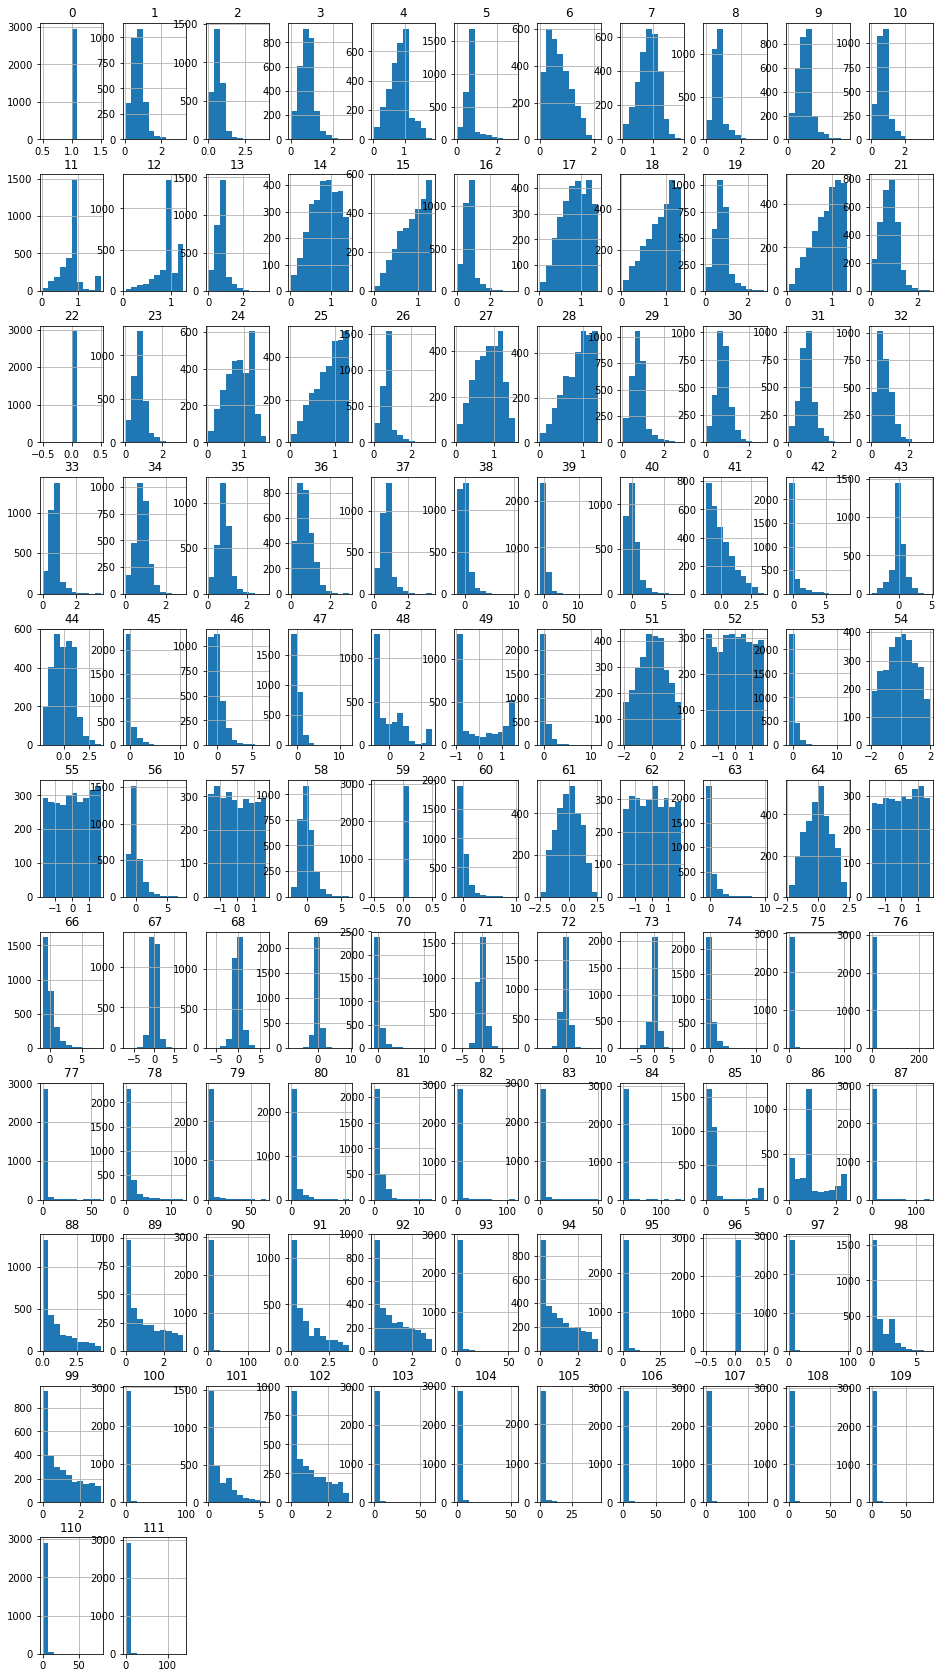

In [32]:

plt.show()

Final values:
0_nan: 1e-09 ~94% degree 1 
0_Nnan: 1e-09 ~ 80% degree 1 
1_nan: 1.37382379588e-05 ~91% degree 1
1_Nnan: 3.56224789026e-09 ~78% degree 1
2_nan: 2.5929437974e-05  ~91% degree 1
2_Nnan:5.73615251045e-07 ~ 82.5% degree 2
3_nan: 0.00788046281567 ~93% degree 1
3_Nnan:0.00117210229753 ~82% degree 2

## Online Testing

In [22]:
ws_0_nan, loss0 = ridge_regression(lambda_=1e-09, tx=px_train_0_nan, y=y_jets_0_nan_train)
ws_1_nan, loss1 = ridge_regression(lambda_=0.00788046281567, tx=px_train_1_nan, y=y_jets_1_nan_train)
ws_2_nan, loss2 = ridge_regression(lambda_= 0.00788046281567, tx=px_train_2_nan, y=y_jets_2_nan_train)
ws_3_nan, loss3 = ridge_regression(lambda_=0.00417531893656, tx=px_train_3_nan, y=y_jets_3_nan_train)
ws_0_Nnan, loss4 = ridge_regression(lambda_=1e-09, tx=px_train_0_Nnan, y=y_jets_0_Nnan_train)
ws_1_Nnan, loss5 = ridge_regression(lambda_=1.08263673387e-06, tx=px_train_1_Nnan, y=y_jets_1_Nnan_train)
ws_2_Nnan, loss6 = ridge_regression(lambda_=5.73615251045e-07, tx=px_train_2_Nnan, y=y_jets_2_Nnan_train)
ws_3_Nnan, loss7 = ridge_regression(lambda_=0.00117210229753, tx=px_train_3_Nnan, y=y_jets_3_Nnan_train)

In [23]:
y_pred_0_nan = predict_labels(ws_0_nan, px_test_0_nan)
y_pred_1_nan = predict_labels(ws_1_nan, px_test_1_nan)
y_pred_2_nan = predict_labels(ws_2_nan, px_test_2_nan)
y_pred_3_nan = predict_labels(ws_3_nan, px_test_3_nan)
y_pred_0_Nnan = predict_labels(ws_0_Nnan, px_test_0_Nnan)
y_pred_1_Nnan = predict_labels(ws_1_Nnan, px_test_1_Nnan)
y_pred_2_Nnan = predict_labels(ws_2_Nnan, px_test_2_Nnan)
y_pred_3_Nnan = predict_labels(ws_3_Nnan, px_test_3_Nnan)

In [24]:
create_csv_submission(idstest_0_nan, y_pred_0_nan, 'jet_pred/prediction_0.csv')
create_csv_submission(idstest_1_nan, y_pred_1_nan, 'jet_pred/prediction_1.csv')
create_csv_submission(idstest_2_nan, y_pred_2_nan, 'jet_pred/prediction_2.csv')
create_csv_submission(idstest_3_nan, y_pred_3_nan, 'jet_pred/prediction_3.csv')
create_csv_submission(idstest_0_Nnan, y_pred_0_Nnan, 'jet_pred/prediction_4.csv')
create_csv_submission(idstest_1_Nnan, y_pred_1_Nnan, 'jet_pred/prediction_5.csv')
create_csv_submission(idstest_2_Nnan, y_pred_2_Nnan, 'jet_pred/prediction_6.csv')
create_csv_submission(idstest_3_Nnan, y_pred_3_Nnan, 'jet_pred/prediction_7.csv')

In [25]:
interesting_files = glob.glob("jet_pred/*.csv")
#allFiles = glob.glob(path + "/*.csv")
with open('someoutputfile_1.csv', 'wb') as outfile:
    for i, fname in enumerate(interesting_files):
        with open(fname, 'rb') as infile:
            if i != 0:
                infile.readline()  # Throw away header on all but first file
            # Block copy rest of file from input to output without parsing
            shutil.copyfileobj(infile, outfile)
            print(fname + " has been imported.")
data = csv.reader(open('someoutputfile_1.csv'),delimiter=',')
sortedlist = sorted(data, key=operator.itemgetter(0))
del sortedlist[len(sortedlist)-1]
with open("Sorted_output.csv", "w") as f:
    fileWriter = csv.writer(f, delimiter=',')
    fileWriter.writerow(["Id", "Prediction"])
    for row in sortedlist:
        fileWriter.writerow([int(row[0]), int(row[1])])

jet_pred/prediction_3.csv has been imported.
jet_pred/prediction_5.csv has been imported.
jet_pred/prediction_4.csv has been imported.
jet_pred/prediction_2.csv has been imported.
jet_pred/prediction_6.csv has been imported.
jet_pred/prediction_0.csv has been imported.
jet_pred/prediction_1.csv has been imported.
jet_pred/prediction_7.csv has been imported.


In [ ]:
gamma = 0.00000001

In [ ]:
seed = 1

# degree_for_0 = 1
# degree_for_1 = 5
# degree_for_2 = 3
# degree_for_3 = 3
#degree = 3
k_fold = 8
lambdas = np.logspace(-9, -1, 30)
k_indices = build_k_indices(y_jets_1_Nnan_train, k_fold, seed)
rmse_tr = []
rmse_te = []
best_loss = 999
best_lambda = 0
for lambda_ in lambdas:
    temp_tr = np.zeros(k_fold)
    temp_te = np.zeros(k_fold)
    for k in range(k_fold):
        tr_loss, te_loss, ws = cross_validation(y_jets_1_Nnan_train, px_train_1_Nnan, k_indices, k, lambda_, degree)
        temp_tr[k] = tr_loss
        temp_te[k] = te_loss
    print(np.mean(temp_te))
    print(np.mean(temp_tr))
    if np.mean(temp_te) < best_loss:
        best_loss = np.mean(temp_te)
        best_lambda = lambda_
    print("After lambdas iteration, the best lambda is : " + str(best_lambda) + " for Lambda : " + str(lambda_) + " with best loss = " + str(best_loss))
    rmse_tr.append(np.mean(temp_tr))
    rmse_te.append(np.mean(temp_te))
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

Degree 1 :
0_nan: 1e-09 ~94%
0_Nnan: 1e-09 ~ 80%
1_nan:1.37382379588e-05 ~91%
1_Nnan:3.56224789026e-09 ~78%
2_nan: 2.5929437974e-05  ~91%
2_Nnan: 3.56224789026e-09 ~82%
3_nan: 0.00788046281567 ~93%
3_Nnan: 3.56224789026e-09 ~81% 



Degree 3 :
0_nan: high lossDegree 2 :
0_nan: high loss
0_Nnan: overfitting
1_nan: 0.00788046281567 ~91% loss:0.145674937621
1_Nnan:1.08263673387e-06 ~ 78% loss:0.312635464222
2_nan: 0.00788046281567 ~90% loss:0.171294027985
2_Nnan: 5.73615251045e-07 ~ 82.5% loss:0.269019687334
3_nan: 0.00417531893656 ~93% loss:0.432321012454
3_Nnan:0.00117210229753 ~82% loss:0.280002335709
0_Nnan: overfitting
1_nan: overfitting
1_Nnan:overfitting
2_nan: overfitting
2_Nnan: overfitting
3_nan: overfitting
3_Nnan:overfitting

Final values:
0_nan:1e-09 ~94% degree 1 
0_Nnan:1e-09 ~ 80% degree 1 
1_nan: 1.37382379588e-05 ~91% degree 1
1_Nnan: 3.56224789026e-09 ~78% degree 1
2_nan: 2.5929437974e-05  ~91% degree 1
2_Nnan:5.73615251045e-07 ~ 82.5% degree 2
3_nan: 0.00788046281567 ~93% degree 1
3_Nnan:0.00117210229753 ~82% degree 2

In [ ]:
train_x_0, train_y_0, test_x_0, test_y_0 = split_data(px_train_0, y_jets_0_train, 0.8, seed=1)
train_x_1, train_y_1, test_x_1, test_y_1 = split_data(px_train_1, y_jets_1_train, 0.8, seed=1)
train_x_2, train_y_2, test_x_2, test_y_2 = split_data(px_train_2, y_jets_2_train, 0.8, seed=1)
train_x_3, train_y_3, test_x_3, test_y_3 = split_data(px_train_3, y_jets_3_train, 0.8, seed=1)
ws_0, loss0 = ridge_regression(lambda_=0.0001, tx=train_x_0, y=train_y_0)
ws_1, loss1 = ridge_regression(lambda_=0.00067233575365, tx=train_x_1, y=train_y_1)
ws_2, loss2 = ridge_regression(lambda_=0.0001, tx=train_x_2, y=train_y_2)
ws_3, loss3 = ridge_regression(lambda_=0.0001, tx=train_x_3, y=train_y_3)
ws_0, loss_sgd0 = logistic_regression(train_y_0, train_x_0, None, 20000, gamma)
ws_1, loss_sgd1 = logistic_regression(train_y_1, train_x_1, None, 20000, gamma)
ws_2, loss_sgd2 = logistic_regression(train_y_2, train_x_2, None, 20000, gamma)
ws_3, loss_sgd3 = logistic_regression(train_y_3, train_x_3, None, 20000, gamma)
y_pred_0 = predict_labels(ws_0, test_x_0)
y_pred_1 = predict_labels(ws_1, test_x_1)
y_pred_2 = predict_labels(ws_2, test_x_2)
y_pred_3 = predict_labels(ws_3, test_x_3)
accuracy_0 = 1 - np.mean( y_pred_0 != test_y_0 )
print("Accuracy: " + str(accuracy_0) + "%")
accuracy_1 = 1 - np.mean( y_pred_1 != test_y_1 )
print("Accuracy: " + str(accuracy_1) + "%")
accuracy_2 = 1 - np.mean( y_pred_2 != test_y_2 )
print("Accuracy: " + str(accuracy_2) + "%")
accuracy_3 = 1 - np.mean( y_pred_3 != test_y_3 )
print("Accuracy: " + str(accuracy_3) + "%")
